<a href="https://colab.research.google.com/github/integrationtoinfinity/TICTAC-game/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Nat_Gas.csv to Nat_Gas (2).csv


<ipython-input-3-3d362060c84b>:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dates'] = pd.to_datetime(df['Dates'])


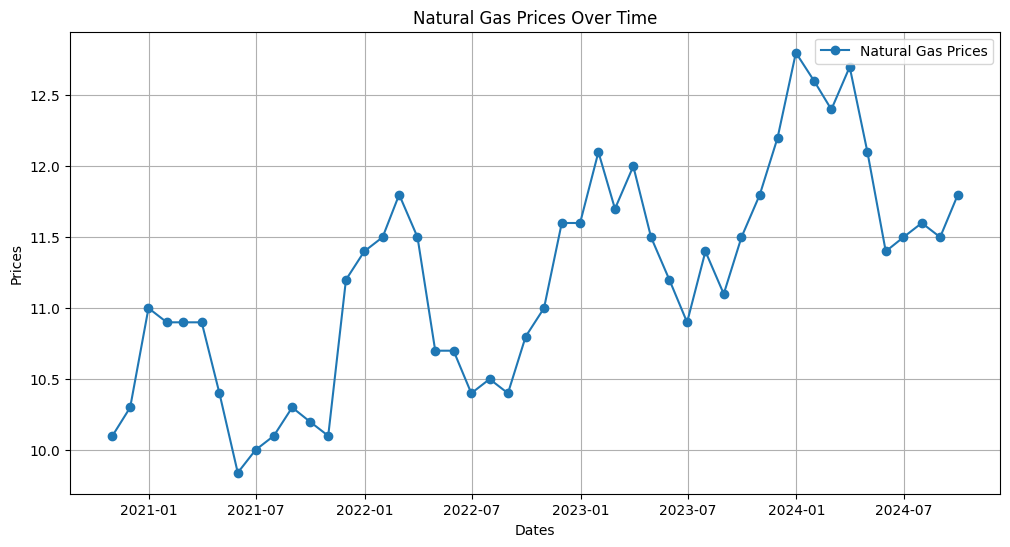

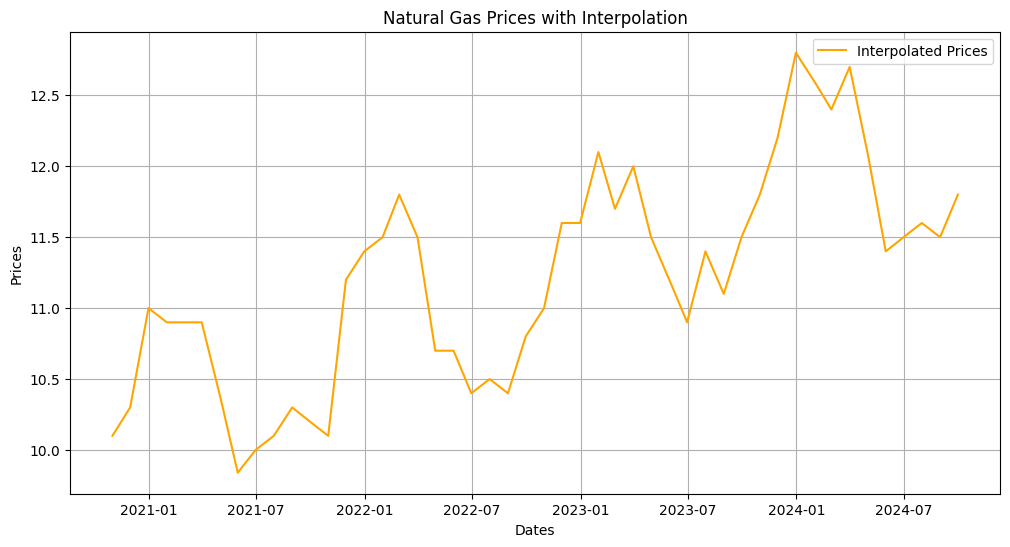

Estimated price on 2022-07-15: 10.448387096774194
Length of future_days: 30
Length of future_dates: 365
Length of future_prices: 30


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


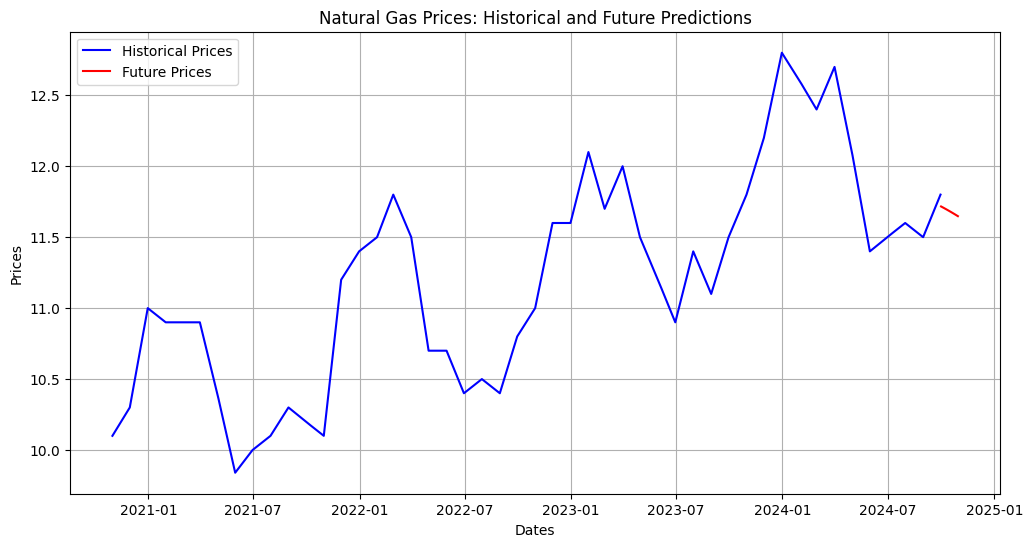

Future predictions saved as 'Future_Natural_Gas_Prices.csv'.


In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Upload your file in Google Colab
from google.colab import files
uploaded = files.upload()

# Load the CSV file
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

# Parse dates and format the DataFrame
df['Dates'] = pd.to_datetime(df['Dates'])
df.set_index('Dates', inplace=True)
df.sort_index(inplace=True)

# Ensure 'Prices' are numeric
df['Prices'] = pd.to_numeric(df['Prices'], errors='coerce')

# 1. Visualize the Time Series
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Prices'], marker='o', label='Natural Gas Prices')
plt.title('Natural Gas Prices Over Time')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.grid()
plt.legend()
plt.show()

# 2. Interpolation for Missing Dates
# Create a continuous date range from start to end
full_date_range = pd.date_range(start=df.index.min(), end=df.index.max(), freq='D')
df_full = df.reindex(full_date_range)
df_full.index.name = 'Dates'

# Use linear interpolation for missing prices
df_full['Prices'] = df_full['Prices'].interpolate(method='linear')

# Visualize interpolated prices
plt.figure(figsize=(12, 6))
plt.plot(df_full.index, df_full['Prices'], label='Interpolated Prices', color='orange')
plt.title('Natural Gas Prices with Interpolation')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.grid()
plt.legend()
plt.show()

# 3. Price Estimation for Any Date (Within Range)
def estimate_price(date_str):
    """Estimate the price for a given date (within the range)."""
    date = pd.to_datetime(date_str)
    if date in df_full.index:
        return df_full.loc[date, 'Prices']
    else:
        return "Date out of range!"

# Test interpolation
test_date = '2022-07-15'  # Example test date
print(f"Estimated price on {test_date}: {estimate_price(test_date)}")

# 4. Future Extrapolation
# Prepare data for regression
df_full = df_full.reset_index()
df_full['Days'] = (df_full['Dates'] - df_full['Dates'].min()).dt.days

X = df_full[['Days']]
y = df_full['Prices']

# Polynomial Regression for smoother extrapolation
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

# Assuming future_days and future_prices are already calculated
future_days = [[i] for i in range(len(X), len(X) + 30)]  # Future days
future_prices = model.predict(poly.transform(future_days))  # Predict prices for future days

# Debugging lengths
print(f"Length of future_days: {len(future_days)}")
print(f"Length of future_dates: {len(future_dates)}")
print(f"Length of future_prices: {len(future_prices)}")

# Ensure future_dates and future_prices are the same length
if len(future_dates) != len(future_prices):
    future_dates = future_dates[:len(future_prices)]

# Create the DataFrame for future predictions
future_df = pd.DataFrame({'Dates': future_dates, 'Predicted Prices': future_prices})

# Plot historical and future prices
plt.figure(figsize=(12, 6))
plt.plot(df_full['Dates'], df_full['Prices'], label='Historical Prices', color='blue')
plt.plot(future_df['Dates'], future_df['Predicted Prices'], label='Future Prices', color='red')
plt.title('Natural Gas Prices: Historical and Future Predictions')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.grid()
plt.legend()
plt.show()

# Save future predictions
future_df.to_csv('Future_Natural_Gas_Prices.csv', index=False)
print("Future predictions saved as 'Future_Natural_Gas_Prices.csv'.")
